<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Bintangor/Bintangor_SAP_RSAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [2]:
from google.colab import auth
auth.authenticate_user()

In [3]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_bintangor"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [4]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_bintangor
Rows: 11548
Columns: 16
Shape: (11548, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
4.864101409912109

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,11548.0,5.680615,3.949815,0.000000,2.600000,5.075000,8.000000,23.000000
To,11548.0,6.448785,3.934414,0.200000,3.000000,6.000000,9.000000,23.900000
Interval,11548.0,0.768170,0.290259,0.050000,0.500000,1.000000,1.000000,3.000000
CoreRec,11548.0,1.081167,0.188022,0.200000,1.000000,1.000000,1.090000,3.500000
WetW,11548.0,4.179988,1.862441,0.400000,2.640000,4.259500,5.515000,13.340000
H2O,11548.0,25.032835,14.841084,0.079000,12.402250,25.364500,36.083250,90.147000
DryW,11548.0,3.181767,1.628951,0.156000,1.835000,3.057500,4.336000,11.840000
WTF,11548.0,1.756388,0.571895,0.195304,1.489770,1.723069,1.953043,23.925631
DTF,11548.0,1.335409,0.587918,0.123134,0.992927,1.266640,1.612504,22.471965



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,5803
BRK,2925
SAP,2291
SAPX,312
LIMX,217



Unique Material count: 50
Top Material value counts:


,count
Material,
YLIM,2423
Rlim,1583
ESAP,1572
HGT,933
HSAP,882
RSAP,831
Sap,700
RLIM,380
DNT,365



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [22]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]


print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: SAP
Masukkan Material yang ingin difilter: RSAP

Filtered rows: 459


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.00,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.00,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.00,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251
1922,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,1.70,2.00,0.30,1.00,1.780,9.831,1.605,RSAP,None,SAP,SAP,2.029432,1.829909
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.00,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6140,CS7210302,Bintangor Blok 1 Spasi 50,BINTANGOR,5.70,6.40,0.70,1.00,3.320,25.301,2.480,RSAP,None,SAP,SAP,1.622242,1.211795
6142,CS7210077,Bintangor Blok 2 Spasi 50,BINTANGOR,5.70,6.00,0.30,1.65,1.964,42.770,1.124,RSAP,None,SAP,SAP,1.357100,0.776670
6145,CS7210055,Bintangor Blok 2 Spasi 50,BINTANGOR,5.70,6.40,0.70,1.00,2.778,35.277,1.798,RSAP,None,SAP,SAP,1.357406,0.878552
6161,CS6210019,Bintangor Blok 2 Spasi 25,BINTANGOR,5.75,6.20,0.45,1.25,2.446,24.448,1.848,RSAP,None,RSAP,SAP,1.487338,1.123712


# Filter By Interval

Descriptive statistics for Interval:
Count: 459
Mean: 0.584248
Standard Error: 0.013191
Median: 0.5
Mode: 1.0
Standard Deviation: 0.282606
Sample Variance: 0.079866
Kurtosis: -0.607963
Skewness: 0.534336
Range: 1.45
Minimum: 0.1
Maximum: 1.55
Sum: 268.1700000000001
Confidence Level (95%): ±0.025922

Bin calculation:
Freedman–Diaconis -> bins: 13, bin width: 0.116673
Sturges -> bins: 10, bin width: 0.145000


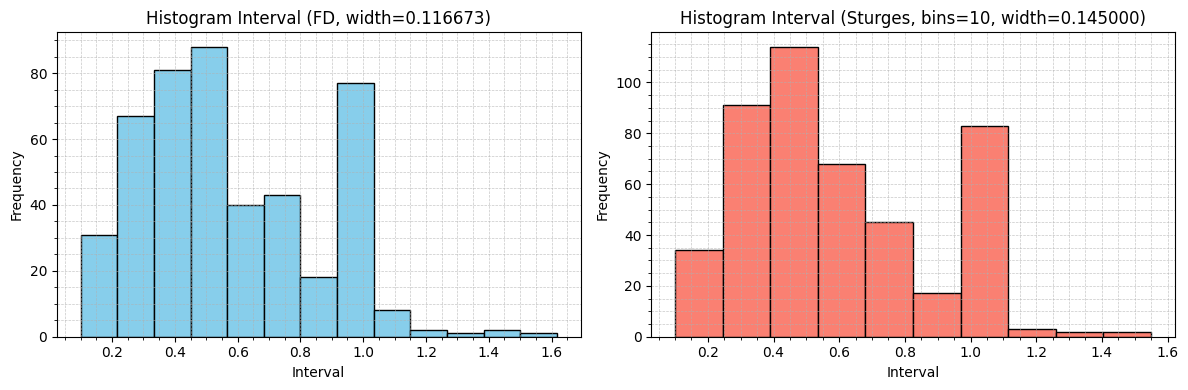


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.100000,0.216673,31
1,0.216673,0.333347,67
2,0.333347,0.450020,81
3,0.450020,0.566693,88
4,0.566693,0.683367,40
5,0.683367,0.800040,43
6,0.800040,0.916713,18
7,0.916713,1.033387,77
8,1.033387,1.150060,8
9,1.150060,1.266733,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.100,0.245,34
1,0.245,0.390,91
2,0.390,0.535,114
3,0.535,0.680,68
4,0.680,0.825,45
5,0.825,0.970,17
6,0.970,1.115,83
7,1.115,1.260,3
8,1.260,1.405,2
9,1.405,1.550,2


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [24]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.100000
Masukkan batas atas (is less than or equal to): 0.800040

Filtered rows: 350


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.00,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.00,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.00,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251
1922,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,1.70,2.00,0.30,1.00,1.780,9.831,1.605,RSAP,None,SAP,SAP,2.029432,1.829909
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.00,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779
2690,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,2.00,2.30,0.30,1.00,0.905,25.967,0.670,RSAP,None,SAP,SAP,1.031818,0.763887
2696,CD500083,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.00,0.885,32.203,0.600,RSAP,None,SAP,SAP,1.513523,1.026117
2918,CD500163,BINTANGOR BARAT SELATAN,BINTANGOR,2.70,3.00,0.30,1.00,0.911,29.528,0.642,RSAP,None,ESAP,SAP,1.038659,0.731964
2929,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.00,1.870,6.684,1.745,RSAP,None,RSAP,SAP,2.132043,1.989527
3734,CD500147,BINTANGOR BARAT SELATAN,BINTANGOR,3.20,3.30,0.10,1.00,0.805,4.969,0.765,RSAP,None,RSAP,SAP,2.753414,2.616599


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 350
Mean: 1.031800
Standard Error: 0.007823
Median: 1.0
Mode: 1.0
Standard Deviation: 0.146354
Sample Variance: 0.021419
Kurtosis: 13.127109
Skewness: 2.515071
Range: 1.6
Minimum: 0.4
Maximum: 2.0
Sum: 361.13
Confidence Level (95%): ±0.015386

Bin calculation:
Freedman–Diaconis -> bins=18, width=N/A
Sturges -> bins=10, width=0.160000


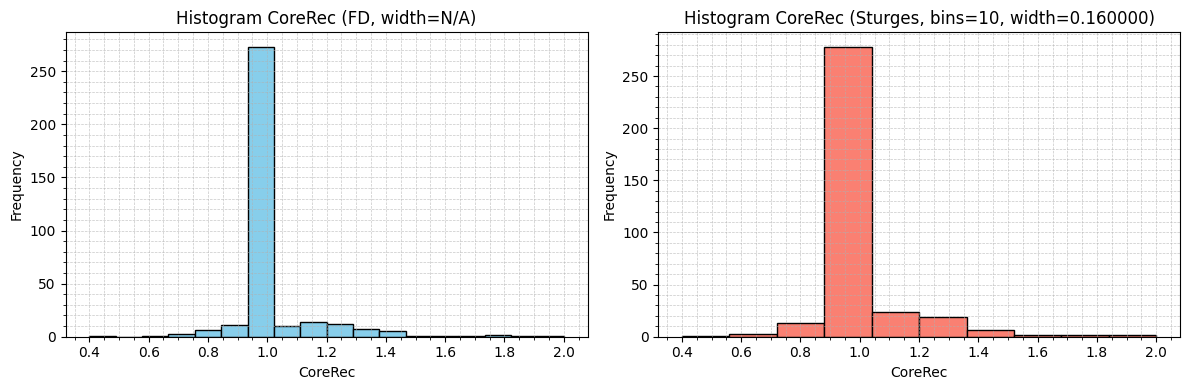


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.400000,0.488889,1
1,0.488889,0.577778,0
2,0.577778,0.666667,1
3,0.666667,0.755556,3
4,0.755556,0.844444,6
5,0.844444,0.933333,11
6,0.933333,1.022222,273
7,1.022222,1.111111,10
8,1.111111,1.200000,14
9,1.200000,1.288889,12



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.40,0.56,1
1,0.56,0.72,3
2,0.72,0.88,13
3,0.88,1.04,278
4,1.04,1.20,24
5,1.20,1.36,19
6,1.36,1.52,6
7,1.52,1.68,2
8,1.68,1.84,2
9,1.84,2.00,2


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [26]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.88
Masukkan batas atas (is less than or equal to): 1.04

Filtered rows: 278


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.00,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.00,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.00,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251
1922,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,1.70,2.00,0.30,1.00,1.780,9.831,1.605,RSAP,None,SAP,SAP,2.029432,1.829909
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.00,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779
2690,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,2.00,2.30,0.30,1.00,0.905,25.967,0.670,RSAP,None,SAP,SAP,1.031818,0.763887
2696,CD500083,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.00,0.885,32.203,0.600,RSAP,None,SAP,SAP,1.513523,1.026117
2918,CD500163,BINTANGOR BARAT SELATAN,BINTANGOR,2.70,3.00,0.30,1.00,0.911,29.528,0.642,RSAP,None,ESAP,SAP,1.038659,0.731964
2929,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.00,1.870,6.684,1.745,RSAP,None,RSAP,SAP,2.132043,1.989527
3734,CD500147,BINTANGOR BARAT SELATAN,BINTANGOR,3.20,3.30,0.10,1.00,0.805,4.969,0.765,RSAP,None,RSAP,SAP,2.753414,2.616599


# Filter By Wet Weight

Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.281, Q3: 0.203, IQR: 0.484
Lower margin: -1.008, Upper margin: 0.929


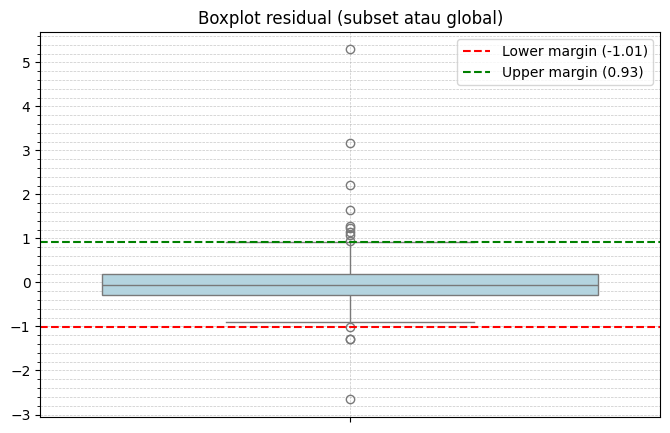

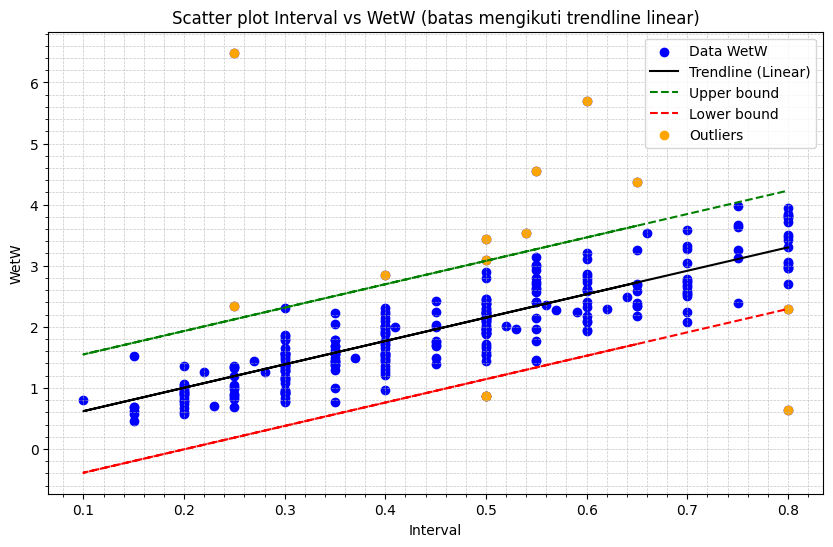


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
         HoleId                       Hill Hill_Group  From    To  Interval  \
4684  CS7210043  Bintangor Blok 2 Spasi 50  BINTANGOR   4.0  4.65      0.65   
4739   CD500080      BINTANGOR BARAT UTARA  BINTANGOR   4.1  4.60      0.50   
4765   CD500159    BINTANGOR BARAT SELATAN  BINTANGOR   4.2  5.00      0.80   
5691  CS7210343  Bintangor Blok 1 Spasi 50  BINTANGOR   5.0  5.50      0.50   
5926   CD500169    BINTANGOR BARAT SELATAN  BINTANGOR   5.4  6.00      0.60   

      CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR       WTF  \
4684      1.0  4.376  52.925  2.060     RSAP  None     SAP     SAP  2.302712   
4739      1.0  0.874  17.620  0.720     RSAP  None    RSAP     SAP  0.597884   
4765      1.0  2.290  14.541  1.957     RSAP  None    ESAP     SAP  0.979087   
5691      1.0  3.434  11.590  3.036     RSAP  None    RSAP     SAP  2.349124   
5926      1.0  5.692   7.572  5.261     RSAP  None    RSAP  

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [28]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.0,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310,3.260
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.0,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022,1.556
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.0,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251,0.688
1922,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,1.70,2.00,0.30,1.0,1.780,9.831,1.605,RSAP,None,SAP,SAP,2.029432,1.829909,1.780
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.0,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,CS6210047,Bintangor Blok 2 Spasi 25,BINTANGOR,16.00,16.80,0.80,1.0,3.946,12.468,3.454,RSAP,None,ESAP,SAP,1.687108,1.476754,3.946
11445,CS6210185,Bintangor Blok 2 Spasi 25,BINTANGOR,17.00,17.50,0.50,1.0,1.906,31.794,1.300,RSAP,None,ESAP,SAP,1.303853,0.889302,1.906
11479,CS7210095,Bintangor Blok 2 Spasi 50,BINTANGOR,18.00,18.60,0.60,1.0,2.316,27.807,1.672,RSAP,None,SAP,SAP,1.320271,0.953149,2.316
11482,CS6210121,Bintangor Blok 2 Spasi 25,BINTANGOR,18.10,18.90,0.80,1.0,3.055,19.804,2.450,RSAP,None,SAP,SAP,1.306162,1.047495,3.055


Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.278, Q3: 0.207, IQR: 0.485
Lower margin: -1.005, Upper margin: 0.934


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


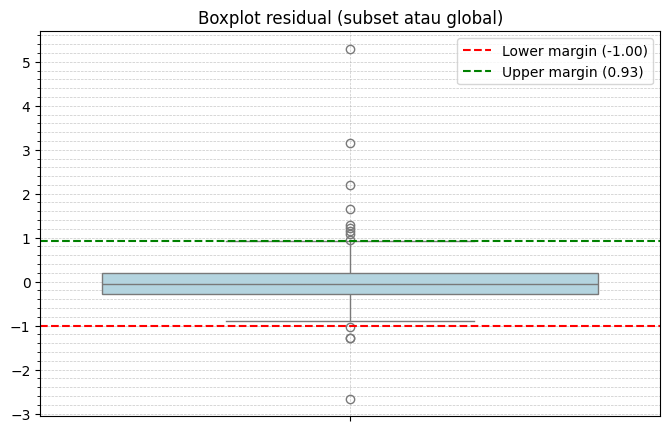

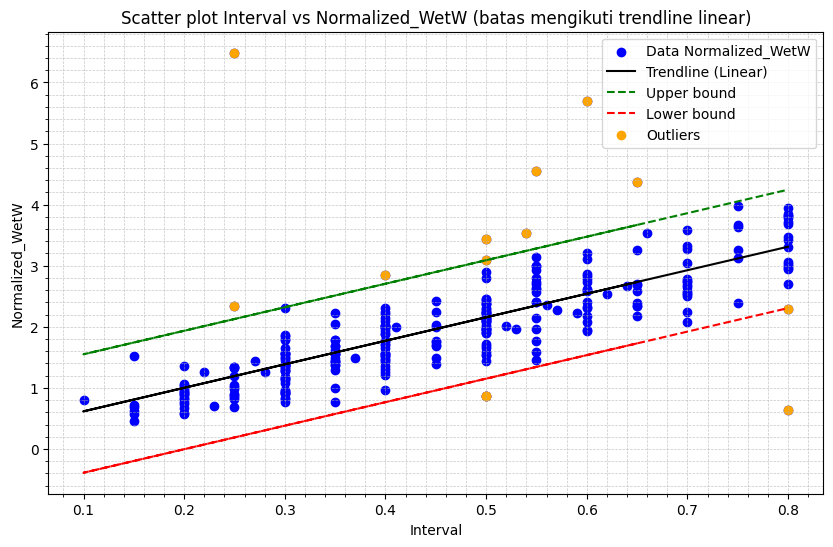

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.0,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310,3.260,2.733722,Normal
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.0,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022,1.556,1.386522,Normal
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.0,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251,0.688,0.809150,Normal
1922,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,1.70,2.00,0.30,1.0,1.780,9.831,1.605,RSAP,None,SAP,SAP,2.029432,1.829909,1.780,1.386522,Normal
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.0,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779,0.894,1.194065,Normal
2690,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,2.00,2.30,0.30,1.0,0.905,25.967,0.670,RSAP,None,SAP,SAP,1.031818,0.763887,0.905,1.386522,Normal
2696,CD500083,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.0,0.885,32.203,0.600,RSAP,None,SAP,SAP,1.513523,1.026117,0.885,1.001608,Normal
2918,CD500163,BINTANGOR BARAT SELATAN,BINTANGOR,2.70,3.00,0.30,1.0,0.911,29.528,0.642,RSAP,None,ESAP,SAP,1.038659,0.731964,0.911,1.386522,Normal
2929,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.870,6.684,1.745,RSAP,None,RSAP,SAP,2.132043,1.989527,1.870,1.386522,Normal
3734,CD500147,BINTANGOR BARAT SELATAN,BINTANGOR,3.20,3.30,0.10,1.0,0.805,4.969,0.765,RSAP,None,RSAP,SAP,2.753414,2.616599,0.805,0.616693,Normal


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=19, width=0.331877
Sturges -> bins=10, width=0.603200


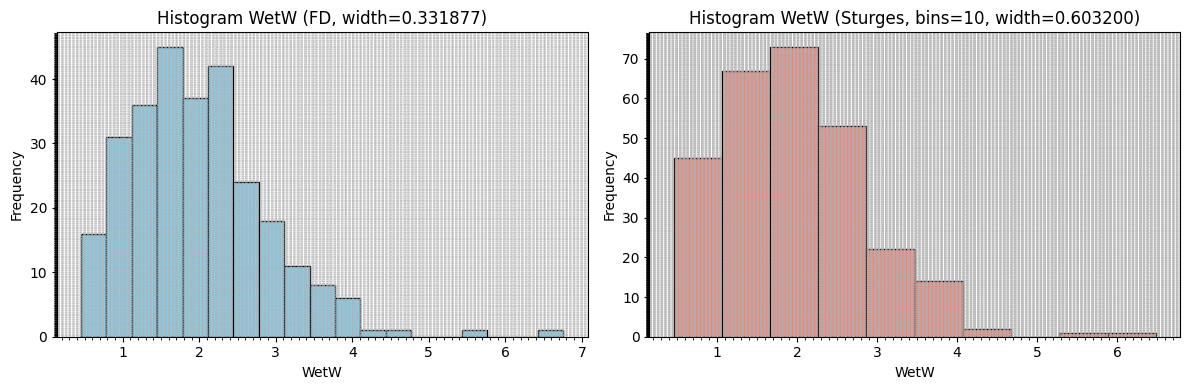


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.454000,0.785877,16
1,0.785877,1.117754,31
2,1.117754,1.449630,36
3,1.449630,1.781507,45
4,1.781507,2.113384,37
5,2.113384,2.445261,42
6,2.445261,2.777137,24
7,2.777137,3.109014,18
8,3.109014,3.440891,11
9,3.440891,3.772768,8



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.4540,1.0572,45
1,1.0572,1.6604,67
2,1.6604,2.2636,73
3,2.2636,2.8668,53
4,2.8668,3.4700,22
5,3.4700,4.0732,14
6,4.0732,4.6764,2
7,4.6764,5.2796,0
8,5.2796,5.8828,1
9,5.8828,6.4860,1


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [31]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 0.454000
Masukkan batas atas (<=): 3.440891

Filtered rows (Normal only): 252


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.0,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310,3.260,2.733722
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.0,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022,1.556,1.386522
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.0,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251,0.688,0.809150
1922,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,1.70,2.00,0.30,1.0,1.780,9.831,1.605,RSAP,None,SAP,SAP,2.029432,1.829909,1.780,1.386522
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.0,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779,0.894,1.194065
2690,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,2.00,2.30,0.30,1.0,0.905,25.967,0.670,RSAP,None,SAP,SAP,1.031818,0.763887,0.905,1.386522
2696,CD500083,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.0,0.885,32.203,0.600,RSAP,None,SAP,SAP,1.513523,1.026117,0.885,1.001608
2918,CD500163,BINTANGOR BARAT SELATAN,BINTANGOR,2.70,3.00,0.30,1.0,0.911,29.528,0.642,RSAP,None,ESAP,SAP,1.038659,0.731964,0.911,1.386522
2929,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.70,3.00,0.30,1.0,1.870,6.684,1.745,RSAP,None,RSAP,SAP,2.132043,1.989527,1.870,1.386522
3734,CD500147,BINTANGOR BARAT SELATAN,BINTANGOR,3.20,3.30,0.10,1.0,0.805,4.969,0.765,RSAP,None,RSAP,SAP,2.753414,2.616599,0.805,0.616693


#Filter By MC


Descriptive statistics for H2O:
Count: 252
Mean: 26.840881
Standard Error: 0.577877
Median: 26.252499999999998
Mode: 4.969
Standard Deviation: 9.173520
Sample Variance: 84.153471
Kurtosis: -0.096769
Skewness: 0.183856
Range: 51.16
Minimum: 4.969
Maximum: 56.129
Sum: 6763.902
Confidence Level (95%): ±1.138107

Bin calculation:
Freedman–Diaconis -> bins=15, width=3.620915
Sturges -> bins=9, width=5.684444


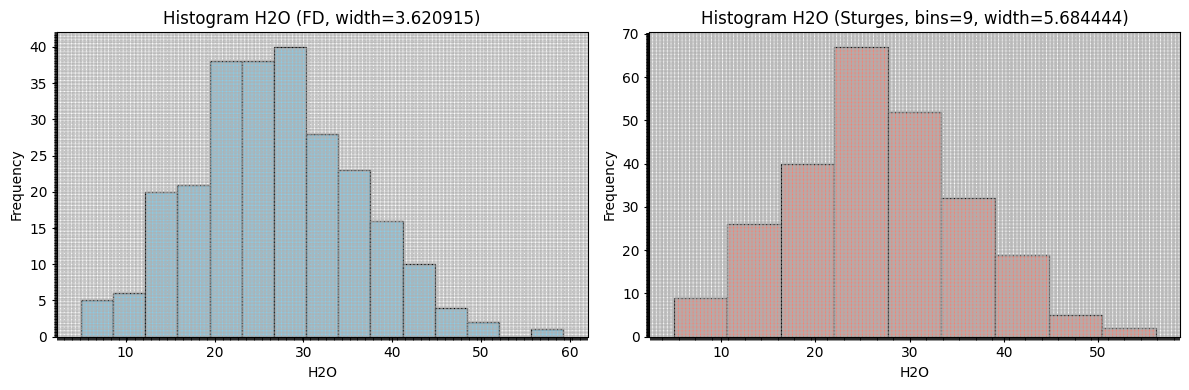


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,4.969000,8.589915,5
1,8.589915,12.210830,6
2,12.210830,15.831744,20
3,15.831744,19.452659,21
4,19.452659,23.073574,38
5,23.073574,26.694489,38
6,26.694489,30.315404,40
7,30.315404,33.936318,28
8,33.936318,37.557233,23
9,37.557233,41.178148,16



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,4.969000,10.653444,9
1,10.653444,16.337889,26
2,16.337889,22.022333,40
3,22.022333,27.706778,67
4,27.706778,33.391222,52
5,33.391222,39.075667,32
6,39.075667,44.760111,19
7,44.760111,50.444556,5
8,50.444556,56.129000,2


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [33]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 10.653444
is less than or equal to: 44.760111

Filtered rows (H2O): 236


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
1725,CS7210126,Bintangor Blok 2 Spasi 50,BINTANGOR,1.10,1.75,0.65,1.0,3.260,18.896,2.644,RSAP,None,SAP,SAP,1.715457,1.391310,3.260,2.733722
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.0,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022,1.556,1.386522
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.0,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251,0.688,0.809150
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.0,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779,0.894,1.194065
2690,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,2.00,2.30,0.30,1.0,0.905,25.967,0.670,RSAP,None,SAP,SAP,1.031818,0.763887,0.905,1.386522
2696,CD500083,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.0,0.885,32.203,0.600,RSAP,None,SAP,SAP,1.513523,1.026117,0.885,1.001608
2918,CD500163,BINTANGOR BARAT SELATAN,BINTANGOR,2.70,3.00,0.30,1.0,0.911,29.528,0.642,RSAP,None,ESAP,SAP,1.038659,0.731964,0.911,1.386522
3782,CS6210154RR,Bintangor Blok 2 Spasi 25,BINTANGOR,3.35,4.00,0.65,1.0,2.346,24.893,1.762,RSAP,None,SAP,SAP,1.234498,0.927189,2.346,2.733722
3813,CS7210343,Bintangor Blok 1 Spasi 50,BINTANGOR,3.40,3.80,0.40,1.0,2.016,17.857,1.656,RSAP,None,RSAP,SAP,1.723877,1.416042,2.016,1.771436
3814,CS7210116,Bintangor Blok 2 Spasi 50,BINTANGOR,3.40,3.80,0.40,1.0,1.938,13.829,1.670,RSAP,None,RSAP,SAP,1.657179,1.428013,1.938,1.771436


# Filter By DTF


Descriptive statistics for DTF:
Count: 236
Mean: 1.066891
Standard Error: 0.017380
Median: 1.0379663335
Mode: 0.763887192
Standard Deviation: 0.266997
Sample Variance: 0.071287
Kurtosis: 0.669128
Skewness: 0.580112
Range: 1.6792488170000002
Minimum: 0.505240527
Maximum: 2.184489344
Sum: 251.78638460400003
Confidence Level (95%): ±0.034241

Bin calculation:
Freedman–Diaconis -> bins=15, width=0.118011
Sturges -> bins=9, width=0.186583


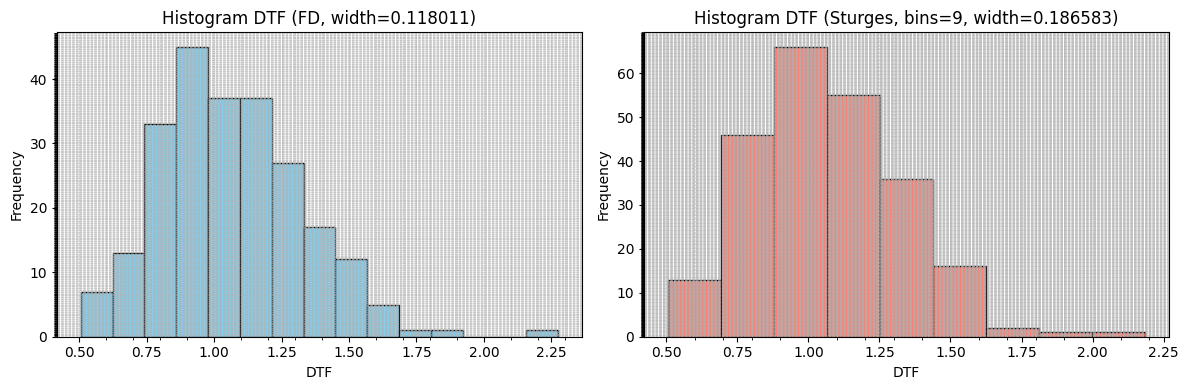


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.505241,0.623251,7
1,0.623251,0.741262,13
2,0.741262,0.859273,33
3,0.859273,0.977283,45
4,0.977283,1.095294,37
5,1.095294,1.213305,37
6,1.213305,1.331315,27
7,1.331315,1.449326,17
8,1.449326,1.567337,12
9,1.567337,1.685347,5



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.505241,0.691824,13
1,0.691824,0.878407,46
2,0.878407,1.064990,66
3,1.064990,1.251573,55
4,1.251573,1.438157,36
5,1.438157,1.624740,16
6,1.624740,1.811323,2
7,1.811323,1.997906,1
8,1.997906,2.184489,1


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [35]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(400))

is greater than or equal to: 0.741262
is less than or equal to: 1.331315

Filtered rows (DTF): 179


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
1787,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.35,1.65,0.30,1.0,1.556,29.820,1.092,RSAP,None,SAP,SAP,1.774042,1.245022,1.556,1.386522
1807,CS7210128,Bintangor Blok 2 Spasi 50,BINTANGOR,1.40,1.55,0.15,1.0,0.688,26.744,0.504,RSAP,None,SAP,SAP,1.568819,1.149251,0.688,0.809150
1931,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.75,2.00,0.25,1.0,0.894,28.971,0.635,RSAP,None,SAP,SAP,1.223132,0.868779,0.894,1.194065
2690,CD500073,BINTANGOR BARAT SELATAN,BINTANGOR,2.00,2.30,0.30,1.0,0.905,25.967,0.670,RSAP,None,SAP,SAP,1.031818,0.763887,0.905,1.386522
2696,CD500083,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.0,0.885,32.203,0.600,RSAP,None,SAP,SAP,1.513523,1.026117,0.885,1.001608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11259,CS7210075,Bintangor Blok 2 Spasi 50,BINTANGOR,14.65,15.10,0.45,1.0,1.482,32.254,1.004,RSAP,None,SAP,SAP,1.126449,0.763127,1.482,1.963893
11320,CS6210047,Bintangor Blok 2 Spasi 25,BINTANGOR,15.00,15.60,0.60,1.0,1.934,18.821,1.570,RSAP,None,ESAP,SAP,1.102506,0.895002,1.934,2.541264
11445,CS6210185,Bintangor Blok 2 Spasi 25,BINTANGOR,17.00,17.50,0.50,1.0,1.906,31.794,1.300,RSAP,None,ESAP,SAP,1.303853,0.889302,1.906,2.156350
11479,CS7210095,Bintangor Blok 2 Spasi 50,BINTANGOR,18.00,18.60,0.60,1.0,2.316,27.807,1.672,RSAP,None,SAP,SAP,1.320271,0.953149,2.316,2.541264


# SUMMARY

In [36]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 179
Mean: 0.457989
Standard Error: 0.012472
Median: 0.5
Mode: 0.5
Standard Deviation: 0.166866
Sample Variance: 0.027844
Kurtosis: -0.798958
Skewness: 0.175064
Range: 0.65
Minimum: 0.15
Maximum: 0.8
Sum: 81.97999999999999
Confidence Level (95%): ±0.024612

Descriptive statistics for CoreRec:
Count: 179
Mean: 0.997374
Standard Error: 0.001102
Median: 1.0
Mode: 1.0
Standard Deviation: 0.014739
Sample Variance: 0.000217
Kurtosis: 32.966151
Skewness: -5.780877
Range: 0.09999999999999998
Minimum: 0.9
Maximum: 1.0
Sum: 178.53
Confidence Level (95%): ±0.002174

Descriptive statistics for WetW:
Count: 179
Mean: 1.866531
Standard Error: 0.049857
Median: 1.918
Mode: 1.37
Standard Deviation: 0.667046
Sample Variance: 0.444950
Kurtosis: -0.758929
Skewness: 0.046893
Range: 2.75
Minimum: 0.57
Maximum: 3.32
Sum: 334.10900000000004
Confidence Level (95%): ±0.098388

Descriptive statistics for H2O:
Count: 179
Mean: 27.380961
Standard Error: 0.531559
Median: 

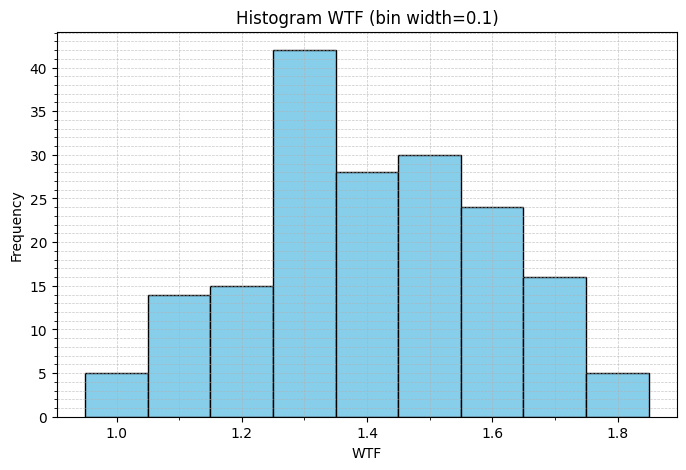


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,0.949728,1.049728,5
1,1.049728,1.149728,14
2,1.149728,1.249728,15
3,1.249728,1.349728,42
4,1.349728,1.449728,28
5,1.449728,1.549728,30
6,1.549728,1.649728,24
7,1.649728,1.749728,16
8,1.749728,1.849728,5


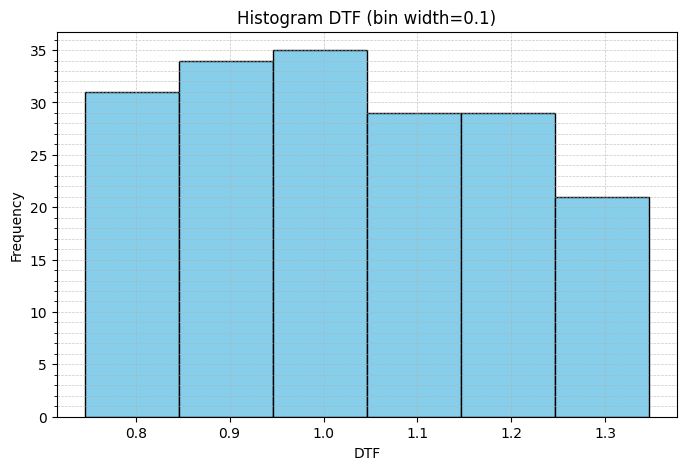


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.746152,0.846152,31
1,0.846152,0.946152,34
2,0.946152,1.046152,35
3,1.046152,1.146152,29
4,1.146152,1.246152,29
5,1.246152,1.346152,21


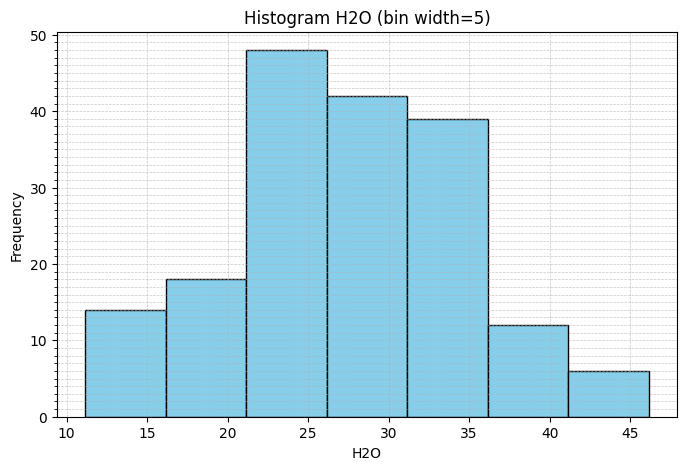


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,11.153,16.153,14
1,16.153,21.153,18
2,21.153,26.153,48
3,26.153,31.153,42
4,31.153,36.153,39
5,36.153,41.153,12
6,41.153,46.153,6


In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [38]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Bintangor
Masukkan GEN_LYR: SAP
Masukkan Material: RSAP

Tabel Ringkasan tersimpan sebagai variabel: df_bintangor_sap_rsap


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Bintangor,SAP,RSAP,0.457989,0.997374,1.866531,27.380961,1.351771,1.410794,1.02318


# Proporsional Averaging

In [ ]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_brk_all = pd.concat([
    df_belambus_selatan_brk_altspt,
    df_belambus_selatan_brk_althgt,
    df_belambus_selatan_brk_br,
    df_belambus_selatan_brk_dnt,
    df_belambus_selatan_brk_hgt,
    df_belambus_selatan_brk_hshgt,
    df_belambus_selatan_brk_spt
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_brk_all.shape)
display(df_belambus_selatan_brk_all.head())

(7, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,ALT SPT,1.0,1.0,5.582000,8.883250,5.087000,1.903017,1.734262
1,Belambus Selatan,BRK,ALT-HGT,1.0,1.0,4.986667,3.139333,4.830000,1.700056,1.646645
2,Belambus Selatan,BRK,BR,1.0,1.0,5.229444,3.667778,5.036667,1.782824,1.717102
3,Belambus Selatan,BRK,DNT,1.0,1.0,6.222750,2.146750,6.089000,2.128423,2.082676
4,Belambus Selatan,BRK,HGT,1.0,1.0,5.497500,3.130750,5.325500,1.877266,1.818528


In [ ]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_brk_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_brk_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,BR,44,1,23.783784
1,SPT,36,1,19.459459
2,HGT,35,1,18.918919
3,ALT SPT,23,1,12.432432
4,HS HGT,21,1,11.351351
5,DNT,16,1,8.648649
6,ALT-HGT,10,1,5.405405


In [ ]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_brk_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,1.0,1.0,5.381342,4.451587,5.144737,1.836069,1.755359
